In [1]:
import pandas as pd
import numpy as np

In [2]:
# Load the file (adjust path as needed)
df = pd.read_excel("D:/AC4024.xlsx")
df.head()

,PARTY Z-14,PARTY Z-16,PARTY Z-19,PARTY Z-21,PARTY Z-24
0,A,A,A,B,B
1,A,A,A,C,B
2,A,A,B,C,C
3,A,A,C,D,C
4,A,A,A,C,C


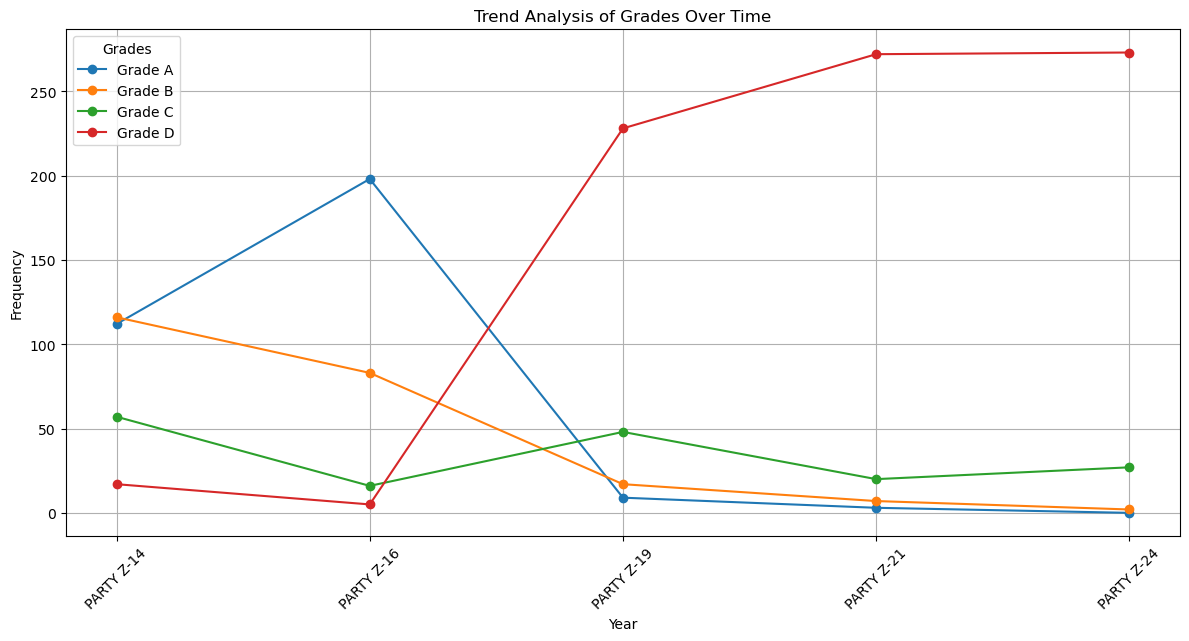

In [3]:
import pandas as pd
import matplotlib.pyplot as plt

# Sample structure assumption:
# df = pd.DataFrame({
#     'Z-14': ['A', 'B', 'A', 'C', 'D'],
#     'Z-16': ['B', 'B', 'C', 'D', 'A'],
#     'Z-18': ['C', 'C', 'B', 'D', 'A']
# })

# Count frequency of each grade per year
grade_counts = df.apply(lambda col: col.value_counts()).fillna(0).astype(int)

# Optional: Ensure consistent order of grades (if applicable)
grade_order = ['A', 'B', 'C', 'D']
grade_counts = grade_counts.reindex(grade_order)

# Plotting
plt.figure(figsize=(12, 6))
for grade in grade_counts.index:
    plt.plot(grade_counts.columns, grade_counts.loc[grade], marker='o', label=f'Grade {grade}')

plt.title('Trend Analysis of Grades Over Time')
plt.xlabel('Year')
plt.ylabel('Frequency')
plt.legend(title='Grades')
plt.grid(True)
plt.tight_layout()
plt.xticks(rotation=45)
plt.show()


In [4]:
def classify_performance(grades):
    """
    Classifies booth/party performance based on grade trends (from earliest to latest).
    Expects grades as a list like ['B', 'B', 'A', 'A', 'A'].
    """

    grade_scale = {'A': 4, 'B': 3, 'C': 2, 'D': 1}
    numeric = [grade_scale[g] for g in grades]

    # 1. Consistently Strong
    if all(g == 'A' for g in grades):
        return "Consistently Strong"

    # 2. Consistently Weak
    if all(g == 'D' for g in grades):
        return "Consistently Weak"

    # 3. Recovering: non-decreasing and ends stronger than it began
    if all(numeric[i] <= numeric[i+1] for i in range(len(numeric) - 1)) and numeric[0] < numeric[-1]:
        return "Recovering"

    # 4. Declining: non-increasing and ends weaker than it began
    if all(numeric[i] >= numeric[i+1] for i in range(len(numeric) - 1)) and numeric[0] > numeric[-1]:
        return "Declining"

    # 5. Swing/Volatile: any pattern that doesn't fit the above
    return "Swing/Volatile"


In [5]:
df['Performance_Category'] = df.apply(classify_performance, axis=1)


In [6]:
# See the first few rows
print(df.head())

# Summary count of categories
print(df['Performance_Category'].value_counts())


  PARTY Z-14 PARTY Z-16 PARTY Z-19 PARTY Z-21 PARTY Z-24 Performance_Category
0          A          A          A          B          B            Declining
1          A          A          A          C          B       Swing/Volatile
2          A          A          B          C          C            Declining
3          A          A          C          D          C       Swing/Volatile
4          A          A          A          C          C            Declining
Performance_Category
Swing/Volatile       160
Declining            139
Consistently Weak      3
Name: count, dtype: int64


In [7]:
df.to_excel("D:/AC4024_analyzed.xlsx", index=False)

In [10]:
# Load the file (adjust path as needed)
df = pd.read_excel("D:/AC4024.xlsx")
df.head()

,PARTY Y-14,PARTY Y-16,PARTY Y-19,PARTY Y-21,PARTY Y-24
0,A,A,A,A,A
1,A,A,A,A,A
2,B,B,B,A,A
3,A,A,A,A,A
4,B,B,B,A,A


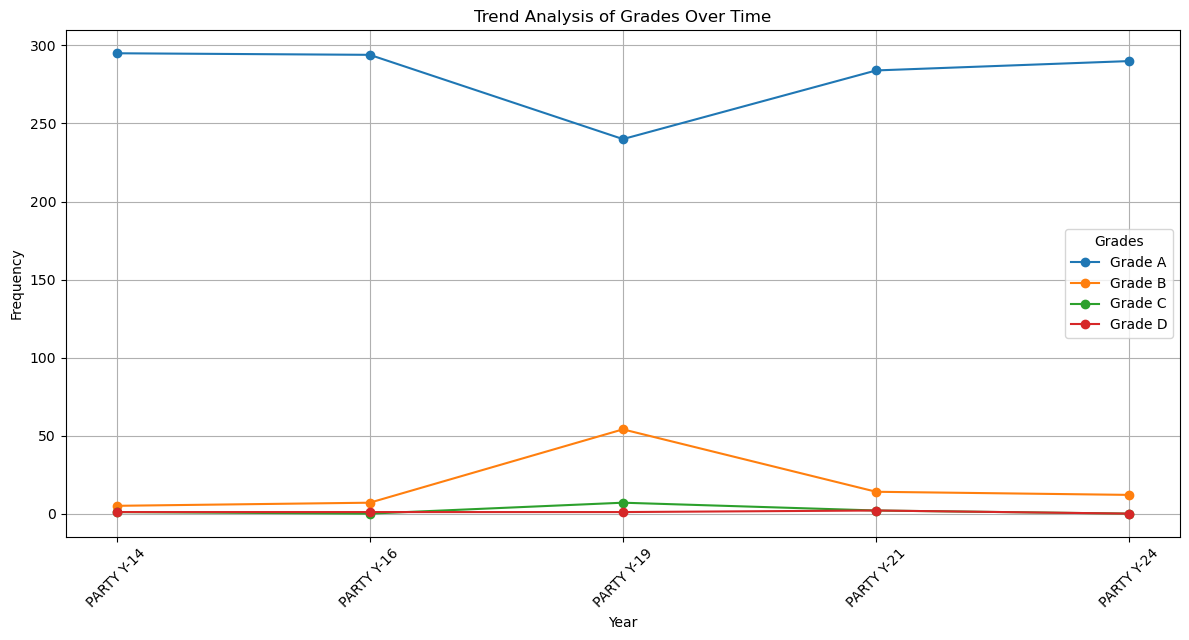

In [11]:
import pandas as pd
import matplotlib.pyplot as plt

# Sample structure assumption:
# df = pd.DataFrame({
#     'Z-14': ['A', 'B', 'A', 'C', 'D'],
#     'Z-16': ['B', 'B', 'C', 'D', 'A'],
#     'Z-18': ['C', 'C', 'B', 'D', 'A']
# })

# Count frequency of each grade per year
grade_counts = df.apply(lambda col: col.value_counts()).fillna(0).astype(int)

# Optional: Ensure consistent order of grades (if applicable)
grade_order = ['A', 'B', 'C', 'D']
grade_counts = grade_counts.reindex(grade_order)

# Plotting
plt.figure(figsize=(12, 6))
for grade in grade_counts.index:
    plt.plot(grade_counts.columns, grade_counts.loc[grade], marker='o', label=f'Grade {grade}')

plt.title('Trend Analysis of Grades Over Time')
plt.xlabel('Year')
plt.ylabel('Frequency')
plt.legend(title='Grades')
plt.grid(True)
plt.tight_layout()
plt.xticks(rotation=45)
plt.show()

In [12]:
def classify_performance(grades):
    """
    Classifies booth/party performance based on grade trends (from earliest to latest).
    Expects grades as a list like ['B', 'B', 'A', 'A', 'A'].
    """

    grade_scale = {'A': 4, 'B': 3, 'C': 2, 'D': 1}
    numeric = [grade_scale[g] for g in grades]

    # 1. Consistently Strong
    if all(g == 'A' for g in grades):
        return "Consistently Strong"

    # 2. Consistently Weak
    if all(g == 'D' for g in grades):
        return "Consistently Weak"

    # 3. Recovering: non-decreasing and ends stronger than it began
    if all(numeric[i] <= numeric[i+1] for i in range(len(numeric) - 1)) and numeric[0] < numeric[-1]:
        return "Recovering"

    # 4. Declining: non-increasing and ends weaker than it began
    if all(numeric[i] >= numeric[i+1] for i in range(len(numeric) - 1)) and numeric[0] > numeric[-1]:
        return "Declining"

    # 5. Swing/Volatile: any pattern that doesn't fit the above
    return "Swing/Volatile"

In [13]:
df['Performance_Category'] = df.apply(classify_performance, axis=1)

In [14]:
# See the first few rows
print(df.head())

# Summary count of categories
print(df['Performance_Category'].value_counts())

  PARTY Y-14 PARTY Y-16 PARTY Y-19 PARTY Y-21 PARTY Y-24 Performance_Category
0          A          A          A          A          A  Consistently Strong
1          A          A          A          A          A  Consistently Strong
2          B          B          B          A          A           Recovering
3          A          A          A          A          A  Consistently Strong
4          B          B          B          A          A           Recovering
Performance_Category
Consistently Strong    226
Swing/Volatile          67
Recovering               6
Declining                3
Name: count, dtype: int64


In [15]:
df.to_excel("D:/AC4024_analyzed.xlsx", index=False)

In [17]:
# Load the file (adjust path as needed)
df = pd.read_excel("D:/AC4024.xlsx")
df.head()

,PARTY X-14,PARTY X-16,PARTY X-19,PARTY X-21,PARTY X-24
0,D,D,D,D,D
1,D,D,D,B,C
2,D,D,A,B,B
3,D,D,C,C,C
4,D,D,B,B,B


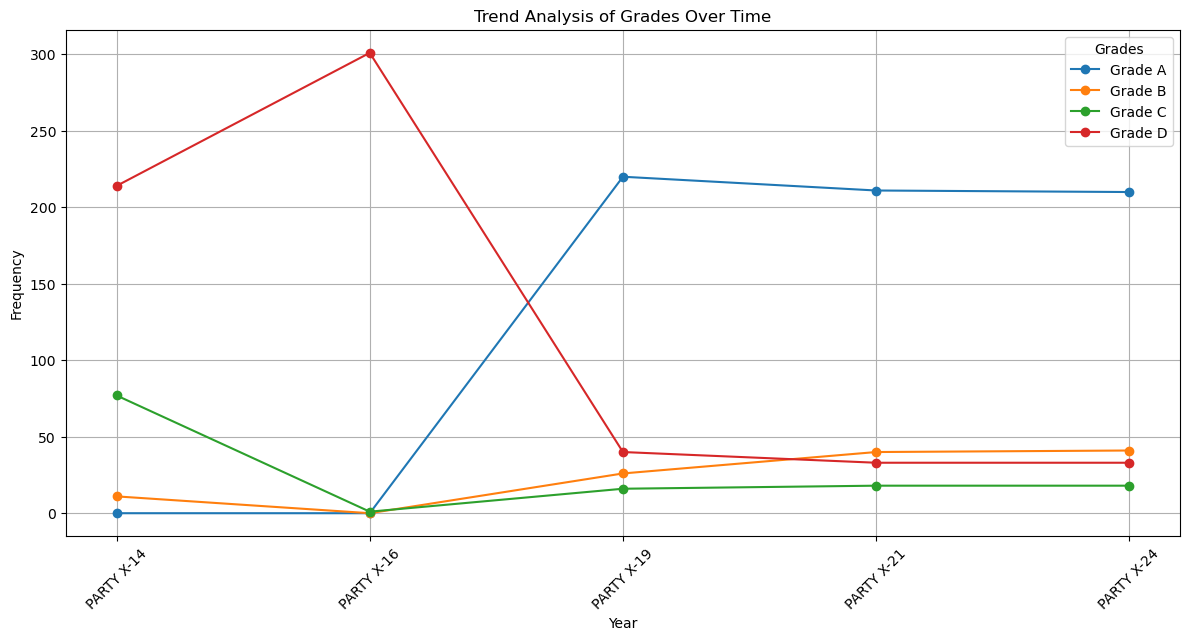

In [18]:
import pandas as pd
import matplotlib.pyplot as plt

# Sample structure assumption:
# df = pd.DataFrame({
#     'Z-14': ['A', 'B', 'A', 'C', 'D'],
#     'Z-16': ['B', 'B', 'C', 'D', 'A'],
#     'Z-18': ['C', 'C', 'B', 'D', 'A']
# })

# Count frequency of each grade per year
grade_counts = df.apply(lambda col: col.value_counts()).fillna(0).astype(int)

# Optional: Ensure consistent order of grades (if applicable)
grade_order = ['A', 'B', 'C', 'D']
grade_counts = grade_counts.reindex(grade_order)

# Plotting
plt.figure(figsize=(12, 6))
for grade in grade_counts.index:
    plt.plot(grade_counts.columns, grade_counts.loc[grade], marker='o', label=f'Grade {grade}')

plt.title('Trend Analysis of Grades Over Time')
plt.xlabel('Year')
plt.ylabel('Frequency')
plt.legend(title='Grades')
plt.grid(True)
plt.tight_layout()
plt.xticks(rotation=45)
plt.show()

In [19]:
def classify_performance(grades):
    """
    Classifies booth/party performance based on grade trends (from earliest to latest).
    Expects grades as a list like ['B', 'B', 'A', 'A', 'A'].
    """

    grade_scale = {'A': 4, 'B': 3, 'C': 2, 'D': 1}
    numeric = [grade_scale[g] for g in grades]

    # 1. Consistently Strong
    if all(g == 'A' for g in grades):
        return "Consistently Strong"

    # 2. Consistently Weak
    if all(g == 'D' for g in grades):
        return "Consistently Weak"

    # 3. Recovering: non-decreasing and ends stronger than it began
    if all(numeric[i] <= numeric[i+1] for i in range(len(numeric) - 1)) and numeric[0] < numeric[-1]:
        return "Recovering"

    # 4. Declining: non-increasing and ends weaker than it began
    if all(numeric[i] >= numeric[i+1] for i in range(len(numeric) - 1)) and numeric[0] > numeric[-1]:
        return "Declining"

    # 5. Swing/Volatile: any pattern that doesn't fit the above
    return "Swing/Volatile"

In [20]:
df['Performance_Category'] = df.apply(classify_performance, axis=1)

In [21]:
# See the first few rows
print(df.head())

# Summary count of categories
print(df['Performance_Category'].value_counts())

  PARTY X-14 PARTY X-16 PARTY X-19 PARTY X-21 PARTY X-24 Performance_Category
0          D          D          D          D          D    Consistently Weak
1          D          D          D          B          C       Swing/Volatile
2          D          D          A          B          B       Swing/Volatile
3          D          D          C          C          C           Recovering
4          D          D          B          B          B           Recovering
Performance_Category
Recovering           145
Swing/Volatile       134
Consistently Weak     23
Name: count, dtype: int64


In [22]:
df.to_excel("D:/AC4024_analyzed.xlsx", index=False)

In [23]:
# Load the file (adjust path as needed)
df = pd.read_excel("D:/AC4024.xlsx")
df.head()

,PARTY Z-14,PARTY Z-16,PARTY Z-19,PARTY Z-21,PARTY Z-24
0,D,C,D,D,D
1,B,A,D,D,D
2,D,D,D,D,D
3,D,D,D,D,D
4,D,D,D,D,D


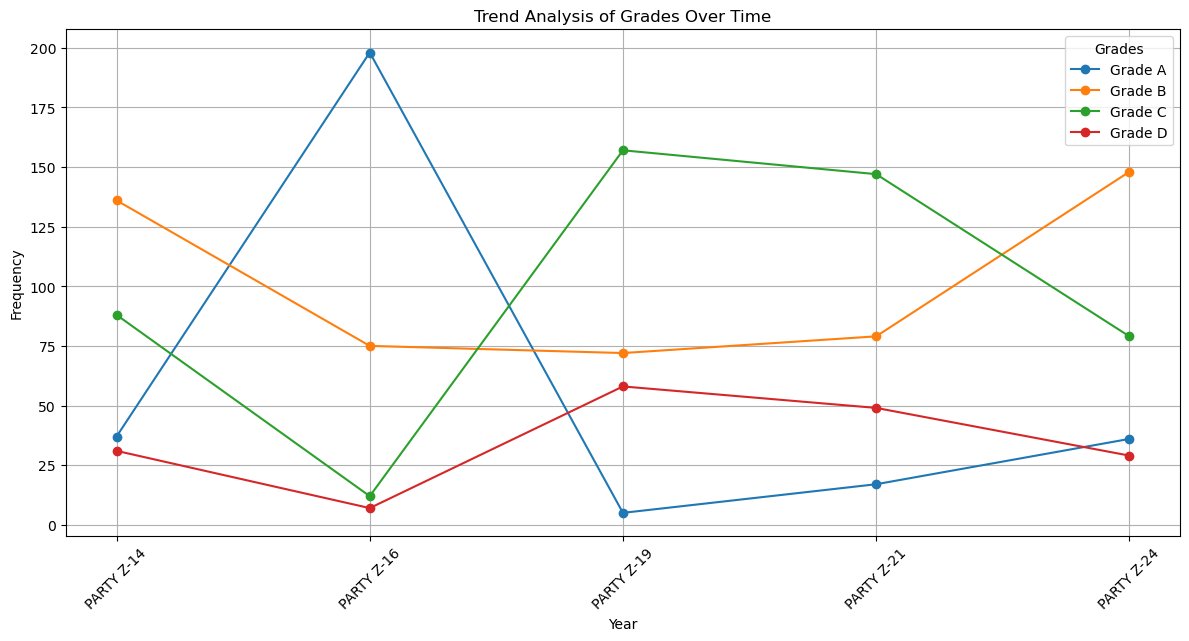

In [24]:
import pandas as pd
import matplotlib.pyplot as plt

# Sample structure assumption:
# df = pd.DataFrame({
#     'Z-14': ['A', 'B', 'A', 'C', 'D'],
#     'Z-16': ['B', 'B', 'C', 'D', 'A'],
#     'Z-18': ['C', 'C', 'B', 'D', 'A']
# })

# Count frequency of each grade per year
grade_counts = df.apply(lambda col: col.value_counts()).fillna(0).astype(int)

# Optional: Ensure consistent order of grades (if applicable)
grade_order = ['A', 'B', 'C', 'D']
grade_counts = grade_counts.reindex(grade_order)

# Plotting
plt.figure(figsize=(12, 6))
for grade in grade_counts.index:
    plt.plot(grade_counts.columns, grade_counts.loc[grade], marker='o', label=f'Grade {grade}')

plt.title('Trend Analysis of Grades Over Time')
plt.xlabel('Year')
plt.ylabel('Frequency')
plt.legend(title='Grades')
plt.grid(True)
plt.tight_layout()
plt.xticks(rotation=45)
plt.show()

In [25]:
def classify_performance(grades):
    """
    Classifies booth/party performance based on grade trends (from earliest to latest).
    Expects grades as a list like ['B', 'B', 'A', 'A', 'A'].
    """

    grade_scale = {'A': 4, 'B': 3, 'C': 2, 'D': 1}
    numeric = [grade_scale[g] for g in grades]

    # 1. Consistently Strong
    if all(g == 'A' for g in grades):
        return "Consistently Strong"

    # 2. Consistently Weak
    if all(g == 'D' for g in grades):
        return "Consistently Weak"

    # 3. Recovering: non-decreasing and ends stronger than it began
    if all(numeric[i] <= numeric[i+1] for i in range(len(numeric) - 1)) and numeric[0] < numeric[-1]:
        return "Recovering"

    # 4. Declining: non-increasing and ends weaker than it began
    if all(numeric[i] >= numeric[i+1] for i in range(len(numeric) - 1)) and numeric[0] > numeric[-1]:
        return "Declining"

    # 5. Swing/Volatile: any pattern that doesn't fit the above
    return "Swing/Volatile"

In [26]:
df['Performance_Category'] = df.apply(classify_performance, axis=1)

In [27]:
# See the first few rows
print(df.head())

# Summary count of categories
print(df['Performance_Category'].value_counts())

  PARTY Z-14 PARTY Z-16 PARTY Z-19 PARTY Z-21 PARTY Z-24 Performance_Category
0          D          C          D          D          D       Swing/Volatile
1          B          A          D          D          D       Swing/Volatile
2          D          D          D          D          D    Consistently Weak
3          D          D          D          D          D    Consistently Weak
4          D          D          D          D          D    Consistently Weak
Performance_Category
Swing/Volatile       259
Recovering            15
Declining             13
Consistently Weak      5
Name: count, dtype: int64


In [28]:
df.to_excel("D:/AC4024_analyzed.xlsx", index=False)

In [29]:
# Load the file (adjust path as needed)
df = pd.read_excel("D:/AC4024.xlsx")
df.head()

,PARTY Y-14,PARTY Y-16,PARTY Y-19,PARTY Y-21,PARTY Y-24
0,D,D,D,C,C
1,B,A,D,D,D
2,C,A,D,C,D
3,D,A,D,C,D
4,D,A,D,C,D


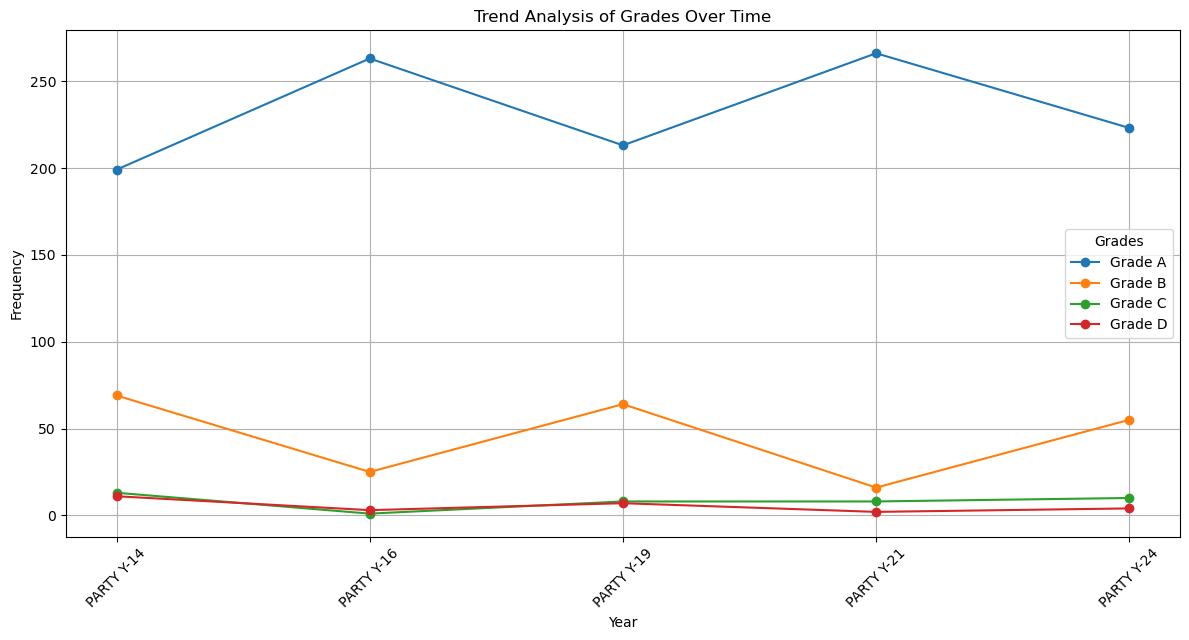

In [30]:
import pandas as pd
import matplotlib.pyplot as plt

# Sample structure assumption:
# df = pd.DataFrame({
#     'Z-14': ['A', 'B', 'A', 'C', 'D'],
#     'Z-16': ['B', 'B', 'C', 'D', 'A'],
#     'Z-18': ['C', 'C', 'B', 'D', 'A']
# })

# Count frequency of each grade per year
grade_counts = df.apply(lambda col: col.value_counts()).fillna(0).astype(int)

# Optional: Ensure consistent order of grades (if applicable)
grade_order = ['A', 'B', 'C', 'D']
grade_counts = grade_counts.reindex(grade_order)

# Plotting
plt.figure(figsize=(12, 6))
for grade in grade_counts.index:
    plt.plot(grade_counts.columns, grade_counts.loc[grade], marker='o', label=f'Grade {grade}')

plt.title('Trend Analysis of Grades Over Time')
plt.xlabel('Year')
plt.ylabel('Frequency')
plt.legend(title='Grades')
plt.grid(True)
plt.tight_layout()
plt.xticks(rotation=45)
plt.show()

In [31]:
def classify_performance(grades):
    """
    Classifies booth/party performance based on grade trends (from earliest to latest).
    Expects grades as a list like ['B', 'B', 'A', 'A', 'A'].
    """

    grade_scale = {'A': 4, 'B': 3, 'C': 2, 'D': 1}
    numeric = [grade_scale[g] for g in grades]

    # 1. Consistently Strong
    if all(g == 'A' for g in grades):
        return "Consistently Strong"

    # 2. Consistently Weak
    if all(g == 'D' for g in grades):
        return "Consistently Weak"

    # 3. Recovering: non-decreasing and ends stronger than it began
    if all(numeric[i] <= numeric[i+1] for i in range(len(numeric) - 1)) and numeric[0] < numeric[-1]:
        return "Recovering"

    # 4. Declining: non-increasing and ends weaker than it began
    if all(numeric[i] >= numeric[i+1] for i in range(len(numeric) - 1)) and numeric[0] > numeric[-1]:
        return "Declining"

    # 5. Swing/Volatile: any pattern that doesn't fit the above
    return "Swing/Volatile"

In [32]:
df['Performance_Category'] = df.apply(classify_performance, axis=1)

In [33]:
# See the first few rows
print(df.head())

# Summary count of categories
print(df['Performance_Category'].value_counts())

  PARTY Y-14 PARTY Y-16 PARTY Y-19 PARTY Y-21 PARTY Y-24 Performance_Category
0          D          D          D          C          C           Recovering
1          B          A          D          D          D       Swing/Volatile
2          C          A          D          C          D       Swing/Volatile
3          D          A          D          C          D       Swing/Volatile
4          D          A          D          C          D       Swing/Volatile
Performance_Category
Consistently Strong    157
Swing/Volatile          75
Recovering              44
Declining               16
Name: count, dtype: int64


In [34]:
df.to_excel("D:/AC6Y_analyzed.xlsx", index=False)

In [35]:
# Load the file (adjust path as needed)
df = pd.read_excel("D:/AC4024.xlsx")
df.head()

,PARTY X-14,PARTY X-16,PARTY X-19,PARTY X-21,PARTY X-24
0,A,A,A,A,A
1,B,D,A,A,A
2,A,B,A,A,A
3,A,A,A,A,A
4,A,B,A,A,A


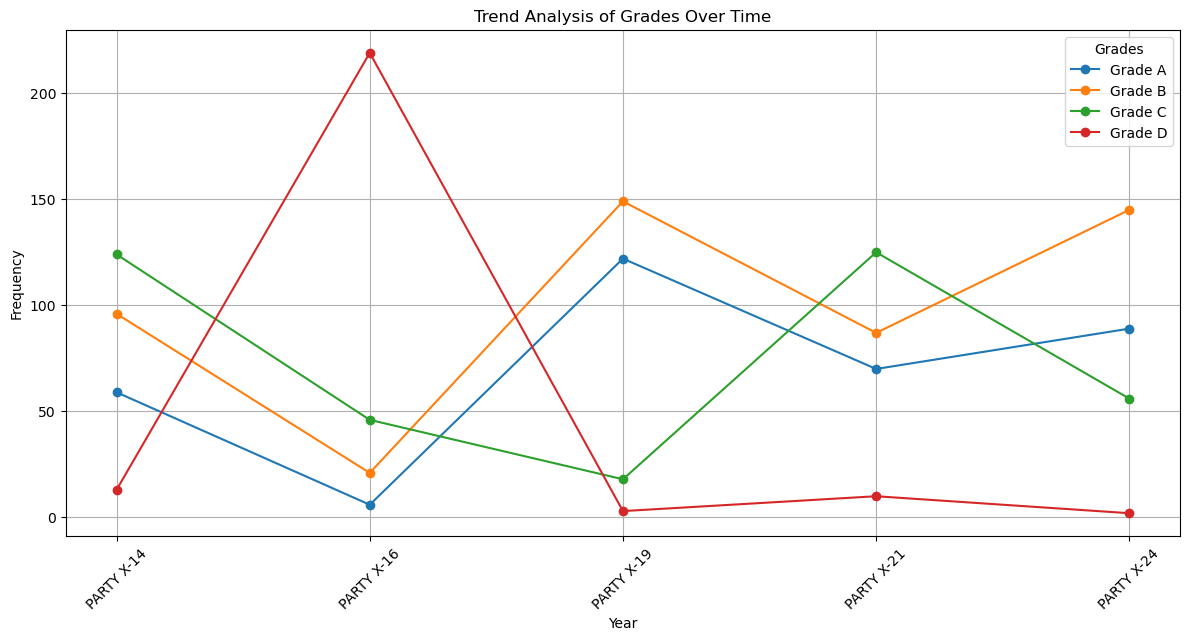

In [36]:
import pandas as pd
import matplotlib.pyplot as plt

# Sample structure assumption:
# df = pd.DataFrame({
#     'Z-14': ['A', 'B', 'A', 'C', 'D'],
#     'Z-16': ['B', 'B', 'C', 'D', 'A'],
#     'Z-18': ['C', 'C', 'B', 'D', 'A']
# })

# Count frequency of each grade per year
grade_counts = df.apply(lambda col: col.value_counts()).fillna(0).astype(int)

# Optional: Ensure consistent order of grades (if applicable)
grade_order = ['A', 'B', 'C', 'D']
grade_counts = grade_counts.reindex(grade_order)

# Plotting
plt.figure(figsize=(12, 6))
for grade in grade_counts.index:
    plt.plot(grade_counts.columns, grade_counts.loc[grade], marker='o', label=f'Grade {grade}')

plt.title('Trend Analysis of Grades Over Time')
plt.xlabel('Year')
plt.ylabel('Frequency')
plt.legend(title='Grades')
plt.grid(True)
plt.tight_layout()
plt.xticks(rotation=45)
plt.show()

In [37]:
def classify_performance(grades):
    """
    Classifies booth/party performance based on grade trends (from earliest to latest).
    Expects grades as a list like ['B', 'B', 'A', 'A', 'A'].
    """

    grade_scale = {'A': 4, 'B': 3, 'C': 2, 'D': 1}
    numeric = [grade_scale[g] for g in grades]

    # 1. Consistently Strong
    if all(g == 'A' for g in grades):
        return "Consistently Strong"

    # 2. Consistently Weak
    if all(g == 'D' for g in grades):
        return "Consistently Weak"

    # 3. Recovering: non-decreasing and ends stronger than it began
    if all(numeric[i] <= numeric[i+1] for i in range(len(numeric) - 1)) and numeric[0] < numeric[-1]:
        return "Recovering"

    # 4. Declining: non-increasing and ends weaker than it began
    if all(numeric[i] >= numeric[i+1] for i in range(len(numeric) - 1)) and numeric[0] > numeric[-1]:
        return "Declining"

    # 5. Swing/Volatile: any pattern that doesn't fit the above
    return "Swing/Volatile"

In [38]:
df['Performance_Category'] = df.apply(classify_performance, axis=1)

In [39]:
# See the first few rows
print(df.head())

# Summary count of categories
print(df['Performance_Category'].value_counts())

  PARTY X-14 PARTY X-16 PARTY X-19 PARTY X-21 PARTY X-24 Performance_Category
0          A          A          A          A          A  Consistently Strong
1          B          D          A          A          A       Swing/Volatile
2          A          B          A          A          A       Swing/Volatile
3          A          A          A          A          A  Consistently Strong
4          A          B          A          A          A       Swing/Volatile
Performance_Category
Swing/Volatile         278
Consistently Strong      5
Recovering               5
Declining                4
Name: count, dtype: int64


In [40]:
df.to_excel("D:/AC6X_analyzed.xlsx", index=False)

In [41]:
# Load the file (adjust path as needed)
df = pd.read_excel("D:/AC4024.xlsx")
df.head()

,PARTY Z-14,PARTY Z-16,PARTY Z-19,PARTY Z-21,PARTY Z-24
0,D,A,D,D,D
1,D,B,D,D,D
2,D,B,D,D,D
3,D,B,D,D,D
4,D,A,D,D,C


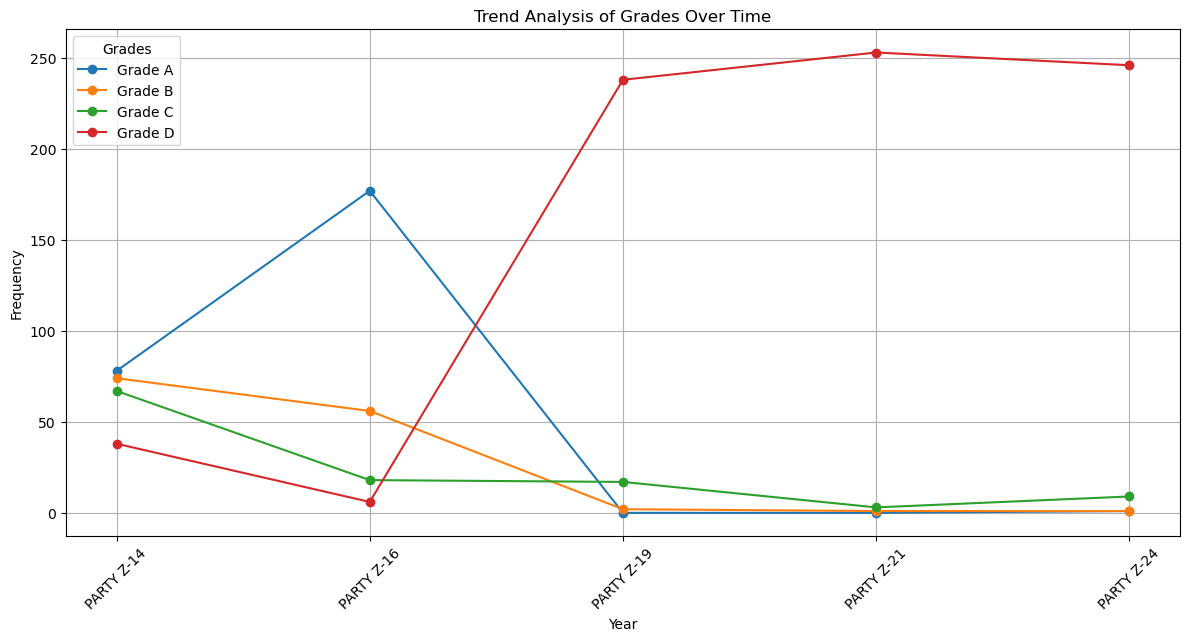

In [42]:
import pandas as pd
import matplotlib.pyplot as plt

# Sample structure assumption:
# df = pd.DataFrame({
#     'Z-14': ['A', 'B', 'A', 'C', 'D'],
#     'Z-16': ['B', 'B', 'C', 'D', 'A'],
#     'Z-18': ['C', 'C', 'B', 'D', 'A']
# })

# Count frequency of each grade per year
grade_counts = df.apply(lambda col: col.value_counts()).fillna(0).astype(int)

# Optional: Ensure consistent order of grades (if applicable)
grade_order = ['A', 'B', 'C', 'D']
grade_counts = grade_counts.reindex(grade_order)

# Plotting
plt.figure(figsize=(12, 6))
for grade in grade_counts.index:
    plt.plot(grade_counts.columns, grade_counts.loc[grade], marker='o', label=f'Grade {grade}')

plt.title('Trend Analysis of Grades Over Time')
plt.xlabel('Year')
plt.ylabel('Frequency')
plt.legend(title='Grades')
plt.grid(True)
plt.tight_layout()
plt.xticks(rotation=45)
plt.show()

In [43]:
def classify_performance(grades):
    """
    Classifies booth/party performance based on grade trends (from earliest to latest).
    Expects grades as a list like ['B', 'B', 'A', 'A', 'A'].
    """

    grade_scale = {'A': 4, 'B': 3, 'C': 2, 'D': 1}
    numeric = [grade_scale[g] for g in grades]

    # 1. Consistently Strong
    if all(g == 'A' for g in grades):
        return "Consistently Strong"

    # 2. Consistently Weak
    if all(g == 'D' for g in grades):
        return "Consistently Weak"

    # 3. Recovering: non-decreasing and ends stronger than it began
    if all(numeric[i] <= numeric[i+1] for i in range(len(numeric) - 1)) and numeric[0] < numeric[-1]:
        return "Recovering"

    # 4. Declining: non-increasing and ends weaker than it began
    if all(numeric[i] >= numeric[i+1] for i in range(len(numeric) - 1)) and numeric[0] > numeric[-1]:
        return "Declining"

    # 5. Swing/Volatile: any pattern that doesn't fit the above
    return "Swing/Volatile"

In [44]:
df['Performance_Category'] = df.apply(classify_performance, axis=1)

In [45]:
# See the first few rows
print(df.head())

# Summary count of categories
print(df['Performance_Category'].value_counts())

  PARTY Z-14 PARTY Z-16 PARTY Z-19 PARTY Z-21 PARTY Z-24 Performance_Category
0          D          A          D          D          D       Swing/Volatile
1          D          B          D          D          D       Swing/Volatile
2          D          B          D          D          D       Swing/Volatile
3          D          B          D          D          D       Swing/Volatile
4          D          A          D          D          C       Swing/Volatile
Performance_Category
Swing/Volatile       148
Declining            103
Consistently Weak      6
Name: count, dtype: int64


In [46]:
df.to_excel("D:/AC12Z_analyzed.xlsx", index=False)

In [47]:
# Load the file (adjust path as needed)
df = pd.read_excel("D:/AC4024.xlsx")
df.head()

,PARTY Y-14,PARTY Y-16,PARTY Y-19,PARTY Y-21,PARTY Y-24
0,D,B,D,D,C
1,D,B,D,D,A
2,D,B,B,A,A
3,D,C,A,A,A
4,D,B,B,B,A


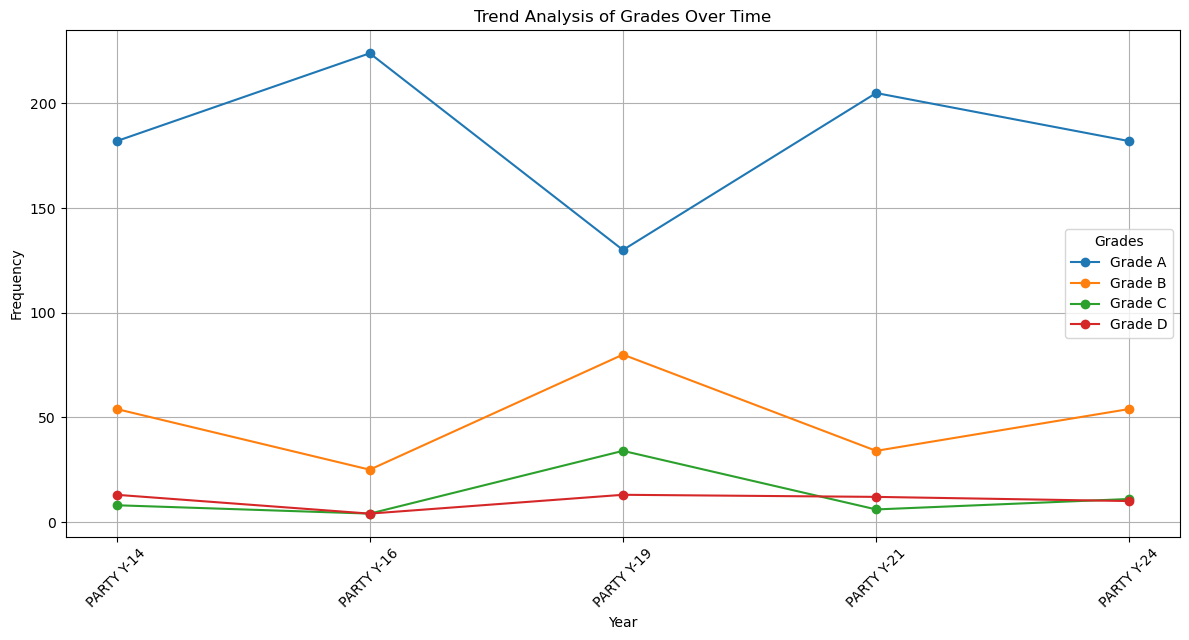

In [48]:
import pandas as pd
import matplotlib.pyplot as plt

# Sample structure assumption:
# df = pd.DataFrame({
#     'Z-14': ['A', 'B', 'A', 'C', 'D'],
#     'Z-16': ['B', 'B', 'C', 'D', 'A'],
#     'Z-18': ['C', 'C', 'B', 'D', 'A']
# })

# Count frequency of each grade per year
grade_counts = df.apply(lambda col: col.value_counts()).fillna(0).astype(int)

# Optional: Ensure consistent order of grades (if applicable)
grade_order = ['A', 'B', 'C', 'D']
grade_counts = grade_counts.reindex(grade_order)

# Plotting
plt.figure(figsize=(12, 6))
for grade in grade_counts.index:
    plt.plot(grade_counts.columns, grade_counts.loc[grade], marker='o', label=f'Grade {grade}')

plt.title('Trend Analysis of Grades Over Time')
plt.xlabel('Year')
plt.ylabel('Frequency')
plt.legend(title='Grades')
plt.grid(True)
plt.tight_layout()
plt.xticks(rotation=45)
plt.show()

In [49]:
def classify_performance(grades):
    """
    Classifies booth/party performance based on grade trends (from earliest to latest).
    Expects grades as a list like ['B', 'B', 'A', 'A', 'A'].
    """

    grade_scale = {'A': 4, 'B': 3, 'C': 2, 'D': 1}
    numeric = [grade_scale[g] for g in grades]

    # 1. Consistently Strong
    if all(g == 'A' for g in grades):
        return "Consistently Strong"

    # 2. Consistently Weak
    if all(g == 'D' for g in grades):
        return "Consistently Weak"

    # 3. Recovering: non-decreasing and ends stronger than it began
    if all(numeric[i] <= numeric[i+1] for i in range(len(numeric) - 1)) and numeric[0] < numeric[-1]:
        return "Recovering"

    # 4. Declining: non-increasing and ends weaker than it began
    if all(numeric[i] >= numeric[i+1] for i in range(len(numeric) - 1)) and numeric[0] > numeric[-1]:
        return "Declining"

    # 5. Swing/Volatile: any pattern that doesn't fit the above
    return "Swing/Volatile"

In [50]:
df['Performance_Category'] = df.apply(classify_performance, axis=1)

In [51]:
# See the first few rows
print(df.head())

# Summary count of categories
print(df['Performance_Category'].value_counts())

  PARTY Y-14 PARTY Y-16 PARTY Y-19 PARTY Y-21 PARTY Y-24 Performance_Category
0          D          B          D          D          C       Swing/Volatile
1          D          B          D          D          A       Swing/Volatile
2          D          B          B          A          A           Recovering
3          D          C          A          A          A           Recovering
4          D          B          B          B          A           Recovering
Performance_Category
Swing/Volatile         117
Consistently Strong     91
Recovering              27
Declining               22
Name: count, dtype: int64


In [52]:
df.to_excel("D:/AC12Y_analyzed.xlsx", index=False)

In [53]:
# Load the file (adjust path as needed)
df = pd.read_excel("D:/AC4024.xlsx")
df.head()

,PARTY X-14,PARTY X-16,PARTY X-19,PARTY X-21,PARTY X-24
0,A,B,A,A,A
1,A,A,A,A,A
2,A,A,A,B,A
3,A,A,D,D,A
4,A,B,A,A,C


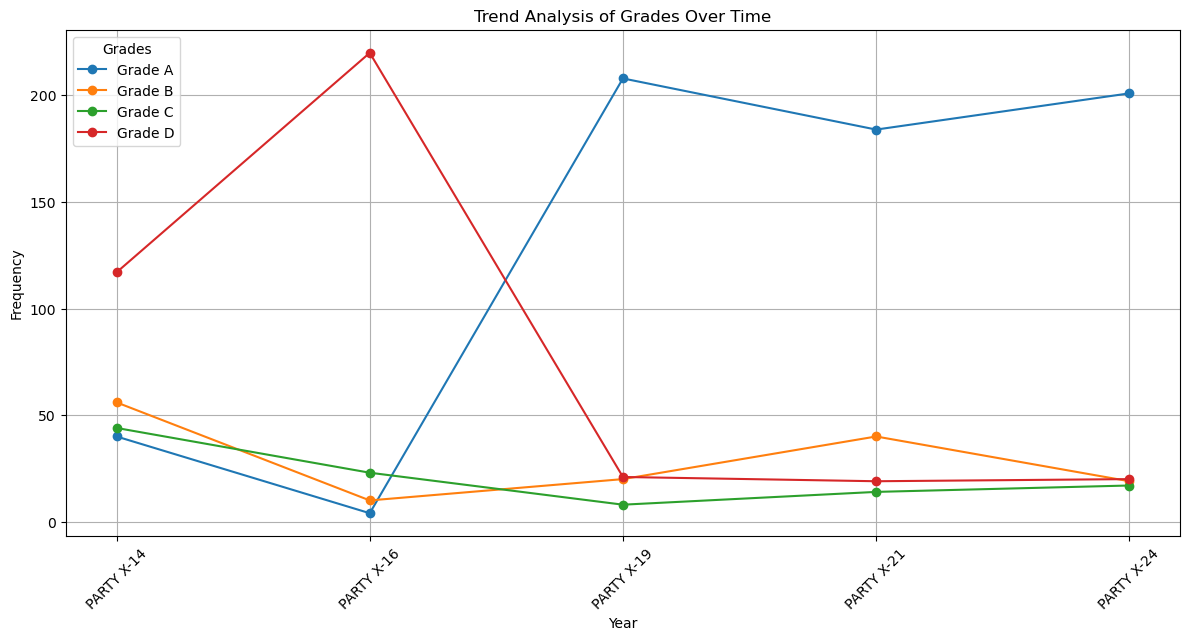

In [54]:
import pandas as pd
import matplotlib.pyplot as plt

# Sample structure assumption:
# df = pd.DataFrame({
#     'Z-14': ['A', 'B', 'A', 'C', 'D'],
#     'Z-16': ['B', 'B', 'C', 'D', 'A'],
#     'Z-18': ['C', 'C', 'B', 'D', 'A']
# })

# Count frequency of each grade per year
grade_counts = df.apply(lambda col: col.value_counts()).fillna(0).astype(int)

# Optional: Ensure consistent order of grades (if applicable)
grade_order = ['A', 'B', 'C', 'D']
grade_counts = grade_counts.reindex(grade_order)

# Plotting
plt.figure(figsize=(12, 6))
for grade in grade_counts.index:
    plt.plot(grade_counts.columns, grade_counts.loc[grade], marker='o', label=f'Grade {grade}')

plt.title('Trend Analysis of Grades Over Time')
plt.xlabel('Year')
plt.ylabel('Frequency')
plt.legend(title='Grades')
plt.grid(True)
plt.tight_layout()
plt.xticks(rotation=45)
plt.show()

In [55]:
def classify_performance(grades):
    """
    Classifies booth/party performance based on grade trends (from earliest to latest).
    Expects grades as a list like ['B', 'B', 'A', 'A', 'A'].
    """

    grade_scale = {'A': 4, 'B': 3, 'C': 2, 'D': 1}
    numeric = [grade_scale[g] for g in grades]

    # 1. Consistently Strong
    if all(g == 'A' for g in grades):
        return "Consistently Strong"

    # 2. Consistently Weak
    if all(g == 'D' for g in grades):
        return "Consistently Weak"

    # 3. Recovering: non-decreasing and ends stronger than it began
    if all(numeric[i] <= numeric[i+1] for i in range(len(numeric) - 1)) and numeric[0] < numeric[-1]:
        return "Recovering"

    # 4. Declining: non-increasing and ends weaker than it began
    if all(numeric[i] >= numeric[i+1] for i in range(len(numeric) - 1)) and numeric[0] > numeric[-1]:
        return "Declining"

    # 5. Swing/Volatile: any pattern that doesn't fit the above
    return "Swing/Volatile"

In [56]:
df['Performance_Category'] = df.apply(classify_performance, axis=1)

In [57]:
# See the first few rows
print(df.head())

# Summary count of categories
print(df['Performance_Category'].value_counts())

  PARTY X-14 PARTY X-16 PARTY X-19 PARTY X-21 PARTY X-24 Performance_Category
0          A          B          A          A          A       Swing/Volatile
1          A          A          A          A          A  Consistently Strong
2          A          A          A          B          A       Swing/Volatile
3          A          A          D          D          A       Swing/Volatile
4          A          B          A          A          C       Swing/Volatile
Performance_Category
Swing/Volatile         176
Recovering              73
Consistently Weak        4
Declining                2
Consistently Strong      2
Name: count, dtype: int64


In [58]:
df.to_excel("D:/AC12X_analyzed.xlsx", index=False)